Taller #2
Integrantes: 
Luisa Fernanda Carpintero 
Majo Melo 
David Eduardo Lopez Jimenez

JUSTIFICACIÓN SELECCION DE BASE DE DATOS: 
Relevancia de la base de datos para su análisis:
El análisis del volumen de visas colombianas recibidas desde 2017 es crucial para comprender las dinámicas migratorias y los factores socioeconómicos que impulsan la movilidad de personas hacia Colombia. Esta información permite identificar patrones de migración asociados a cambios políticos, económicos y sociales tanto en los países de origen como en Colombia. Además, su estudio facilita la formulación de políticas migratorias más eficientes y adaptadas a las tendencias actuales.

Tipo de información contenida y su utilidad para el EDA:
La base de datos incluye variables clave como el año de solicitud, nacionalidad, sexo, fecha de nacimiento, vocación de permanencia y número de solicitudes. Estos datos son útiles para el Análisis Exploratorio de Datos (EDA) porque permiten detectar tendencias migratorias, analizar la distribución de nacionalidades, identificar diferencias en la vocación de permanencia y evaluar si existen variaciones significativas en función del género o la edad. A través de visualizaciones y estadísticas descriptivas, se pueden extraer insights valiosos sobre la migración a Colombia y su posible relación con eventos globales o políticas gubernamentales.

1. Variables disponibles y tipos de datos

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset (asegúrate de tener el archivo CSV disponible)
df = pd.read_csv("C://Users//David Lopez//OneDrive - Universidad de la Sabana//unisabana//Sexto Semestre//Analitica de datos//Taller 2//Volumen_de_solicitudes_de_visa_colombiana_recibidas_desde_2017_20250203.csv", encoding="utf-8")

# Mostrar las primeras filas para ver la estructura
print(df.head())

# Identificar los tipos de datos
print(df.dtypes)

   Año Solicitud         Nacionalidad      Sexo Fecha de Nacimiento  \
0           2017          ECUATORIANA  FEMENINO          24/07/1897   
1           2017  FEDERACION DE RUSIA  FEMENINO          03/05/1919   
2           2017             FRANCESA  FEMENINO          20/08/1919   
3           2017               CUBANA  FEMENINO          03/02/1922   
4           2017       ESTADOUNIDENSE  FEMENINO          17/11/1922   

       Vocación de permanencia  Número  
0  Con vocación de permanencia       2  
1  Sin vocación de permanencia       2  
2  Sin vocación de permanencia       1  
3  Sin vocación de permanencia       2  
4  Sin vocación de permanencia       1  
Año Solicitud               int64
Nacionalidad               object
Sexo                       object
Fecha de Nacimiento        object
Vocación de permanencia    object
Número                      int64
dtype: object


2. Total de registros y representatividad de la muestra

In [3]:
print(f"Total de registros: {df.shape[0]}")
# Contar valores nulos por columna
missing_values = df.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
missing_percentage = (missing_values / len(df)) * 100

# Mostrar el resultado
missing_df = pd.DataFrame({"Valores Nulos": missing_values, "Porcentaje (%)": missing_percentage})
print(missing_df)


Total de registros: 349583
                         Valores Nulos  Porcentaje (%)
Año Solicitud                        0        0.000000
Nacionalidad                         0        0.000000
Sexo                                 7        0.002002
Fecha de Nacimiento                  0        0.000000
Vocación de permanencia              0        0.000000
Número                               0        0.000000


Tecnologías a utilizadar:
Python: Lenguaje de programación principal.
pandas: Para manipulación y limpieza de datos.
numpy: Para operaciones matemáticas y estadísticas.
matplotlib: Para visualización de datos.

Resumen estadístico inicial

In [4]:
print(df.describe(include="all"))  # Incluye estadísticas de variables numéricas y categóricas


        Año Solicitud Nacionalidad       Sexo Fecha de Nacimiento  \
count   349583.000000       349583     349576              349583   
unique            NaN          199          2               31083   
top               NaN   VENEZOLANA  MASCULINO          01/01/1990   
freq              NaN        69094     224294                  57   
mean      2019.270342          NaN        NaN                 NaN   
std          1.825129          NaN        NaN                 NaN   
min       2017.000000          NaN        NaN                 NaN   
25%       2018.000000          NaN        NaN                 NaN   
50%       2019.000000          NaN        NaN                 NaN   
75%       2021.000000          NaN        NaN                 NaN   
max       2024.000000          NaN        NaN                 NaN   

            Vocación de permanencia         Número  
count                        349583  349583.000000  
unique                            2            NaN  
top     Con 

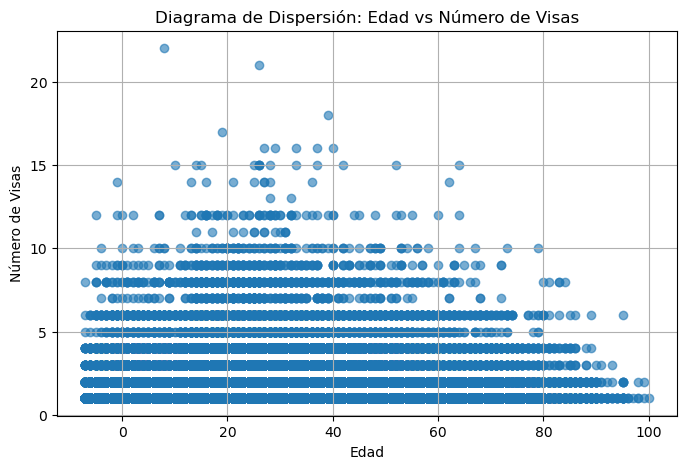

In [10]:
# Cargar los datos (Asegúrate de que df ya esté definido)
df["Fecha de Nacimiento"] = pd.to_datetime(df["Fecha de Nacimiento"], errors="coerce")

# Filtrar fechas de nacimiento inválidas (ejemplo: personas mayores de 100 años en 2017)
df = df[df["Fecha de Nacimiento"].dt.year >= 1917]  # Solo personas nacidas después de 1917

# Calcular la edad correctamente
df["Edad"] = 2017 - df["Fecha de Nacimiento"].dt.year

# Crear diagrama de dispersión entre edad y número de visas otorgadas
plt.figure(figsize=(8, 5))
plt.scatter(df["Edad"], df["Número"], alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Número de Visas")
plt.title("Diagrama de Dispersión: Edad vs Número de Visas")
plt.grid(True)
plt.show()

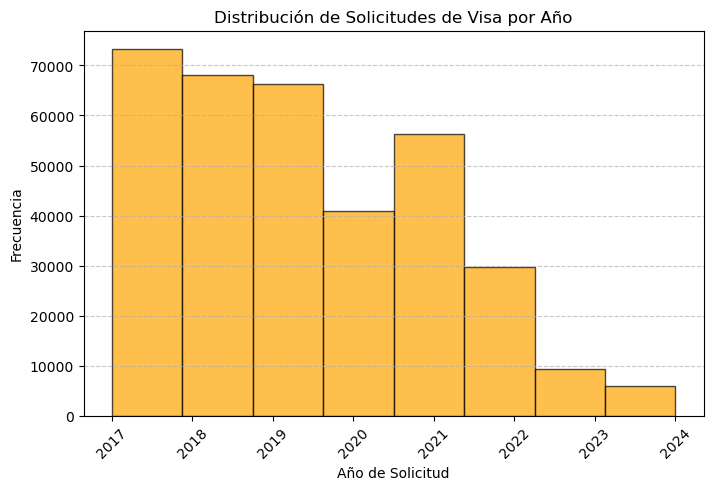

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(df["Año Solicitud"], bins=len(df["Año Solicitud"].unique()), color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Año de Solicitud")
plt.ylabel("Frecuencia")
plt.title("Distribución de Solicitudes de Visa por Año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()